In [1]:
text = "This is my test text. We're keeping this text short to keep things manageable."

In [2]:
def count_words(text):
    """
    Takes an input text and counts the number of times each word appears in it.
    Returns a dictionary where the keys are the words, and the values are the counts.
    Turns capitals to lowercase, removes punctuation.
    """
    text = text.lower()
    skips = [".", ",", ";", "'", '"']
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = {}
    for word in text.split(" "):
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts

In [3]:
count_words(text)

{'this': 2,
 'is': 1,
 'my': 1,
 'test': 1,
 'text': 2,
 'were': 1,
 'keeping': 1,
 'short': 1,
 'to': 1,
 'keep': 1,
 'things': 1,
 'manageable': 1}

In [4]:
text = text.replace("", "")

In [5]:
from collections import Counter

In [6]:
def count_words_fast(text):
    """
    Takes an input text and counts the number of times each word appears in it.
    Returns a dictionary where the keys are the words, and the values are the counts.
    Turns capitals to lowercase, removes punctuation.
    """
    text = text.lower()
    skips = [".", ",", ";", "'", '"', "(", ")"]
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = {}
    word_counts = Counter(text.split(" "))
    return word_counts

In [7]:
count_words_fast(text)

Counter({'this': 2,
         'is': 1,
         'my': 1,
         'test': 1,
         'text': 2,
         'were': 1,
         'keeping': 1,
         'short': 1,
         'to': 1,
         'keep': 1,
         'things': 1,
         'manageable': 1})

In [8]:
count_words_fast(text) is count_words(text)

False

In [9]:
len(count_words("This comprehension check is to check for comprehension."))

6

In [10]:
def read_book(title_path):
    """
    Read a book and return it as a string.
    """
    with open(title_path, "r", encoding="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    return text

In [11]:
text = read_book("./Books/English/Shakespeare/Romeo and Juliet.txt")

In [12]:
len(text)

169275

In [13]:
ind = text.find("What's in a name?")

In [14]:
sample_text = text[ind:ind+1000]

In [15]:
sample_text

"What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo would, were he not Romeo call'd,    Retain that dear perfection which he owes    Without that title. Romeo, doff thy name;    And for that name, which is no part of thee,    Take all myself.  Rom. I take thee at thy word.    Call me but love, and I'll be new baptiz'd;    Henceforth I never will be Romeo.  Jul. What man art thou that, thus bescreen'd in night,    So stumblest on my counsel?  Rom. By a name    I know not how to tell thee who I am.    My name, dear saint, is hateful to myself,    Because it is an enemy to thee.    Had I it written, I would tear the word.  Jul. My ears have yet not drunk a hundred words    Of that tongue's utterance, yet I know the sound.    Art thou not Romeo, and a Montague?  Rom. Neither, fair saint, if either thee dislike.  Jul. How cam'st thou hither, tell me, and wherefore?    The orchard walls are high and hard to climb,    And the place death, consid

In [16]:
def word_stats(word_counts):
    """Return number of unique words and frequencies."""
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

In [17]:
text = read_book("./Books/English/Shakespeare/Romeo and Juliet.txt")

In [18]:
word_counts = count_words(text)

In [19]:
(num_unique, counts) = word_stats(word_counts)

In [20]:
num_unique

5135

In [21]:
text = read_book("./Books/German/Shakespeare/Romeo und Julia.txt")

In [22]:
word_counts = count_words(text)

In [23]:
(num_unique, counts) = word_stats(word_counts)

In [24]:
num_unique

7570

In [25]:
import os

In [26]:
book_dir = "./Books"

In [ ]:
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))
            

In [29]:
import pandas as pd

In [31]:
table = pd.DataFrame(columns = ("name", "age"))

In [32]:
table

,name,age


In [33]:
table.loc[1] = "James", 22

In [34]:
table.loc[2] = "Jess", 32        

In [37]:
table

,name,age
1,James,22
2,Jess,32


In [50]:
stats = pd.DataFrame(columns = ("language", "author", "title", "length", "unique"))

In [51]:
title_num = 1

In [ ]:
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))
            stats.loc[title_num] = language, author.capitalize(), title.replace(".txt", ""), sum(counts), num_unique
            title_num += 1

In [53]:
stats

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5488
...,...,...,...,...,...
98,Portuguese,Queir¢s,O crime do padre Amaro,128630,29716
99,Portuguese,Queir¢s,O Mandarim,21440,7941
100,Portuguese,Queir¢s,O Primo Bazilio,107303,28059
101,Portuguese,Queir¢s,Os Maias,195771,41217


In [48]:
stats.head()

,language,author,title,length,unique
1,English,shakespeare,A Midsummer Night's Dream.txt,16103,4345
2,English,shakespeare,Hamlet.txt,28551,6776
3,English,shakespeare,Macbeth.txt,16874,4780
4,English,shakespeare,Othello.txt,26590,5898
5,English,shakespeare,Richard III.txt,48315,5488


In [43]:
stats.tail()

,language,author,title,length,unique
98,Portuguese,Queir¢s,O crime do padre Amaro.txt,128630,29716
99,Portuguese,Queir¢s,O Mandarim.txt,21440,7941
100,Portuguese,Queir¢s,O Primo Bazilio.txt,107303,28059
101,Portuguese,Queir¢s,Os Maias.txt,195771,41217
102,Portuguese,shakespeare,Hamlet.txt,30567,9733


In [44]:
stats.loc[1]

language                          English
author                        shakespeare
title       A Midsummer Night's Dream.txt
length                              16103
unique                               4345
Name: 1, dtype: object

In [45]:
stats.loc[2]

language        English
author      shakespeare
title        Hamlet.txt
length            28551
unique             6776
Name: 2, dtype: object

In [54]:
stats.length

1       16103
2       28551
3       16874
4       26590
5       48315
        ...  
98     128630
99      21440
100    107303
101    195771
102     30567
Name: length, Length: 102, dtype: object

In [55]:
stats.unique

1       4345
2       6776
3       4780
4       5898
5       5488
       ...  
98     29716
99      7941
100    28059
101    41217
102     9733
Name: unique, Length: 102, dtype: object

In [56]:
import matplotlib.pyplot as plt

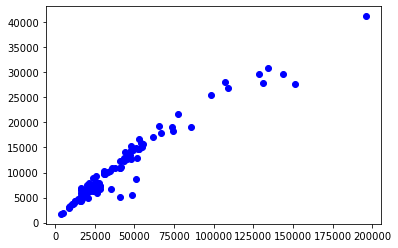

In [59]:
plt.plot(stats.length, stats.unique, "bo")

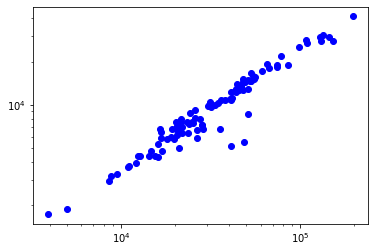

In [60]:
plt.loglog(stats.length, stats.unique, "bo")

In [61]:
stats[stats.language == "English"]

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5488
6,English,Shakespeare,Romeo and Juliet,40776,5135
7,English,Shakespeare,The Merchant of Venice,20949,4978


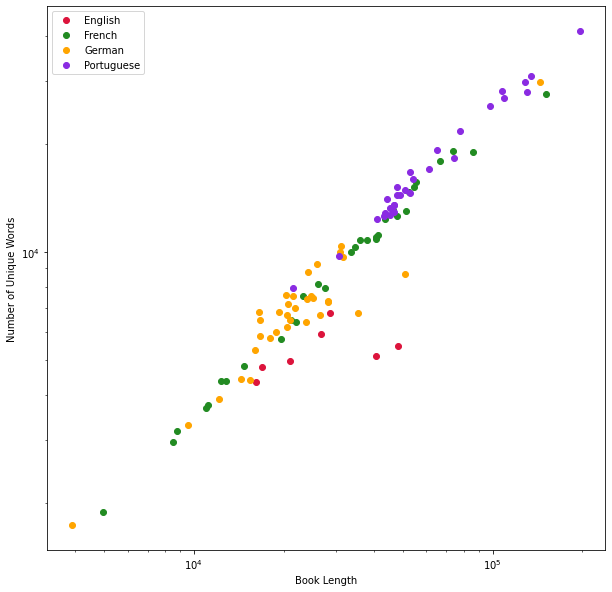

In [67]:
plt.figure(figsize = (10,10))
subset = stats[stats.language == "English"]
plt.loglog(subset.length, subset.unique, "o", label = "English", color = "crimson")
subset = stats[stats.language == "French"]
plt.loglog(subset.length, subset.unique, "o", label = "French", color = "forestgreen")
subset = stats[stats.language == "German"]
plt.loglog(subset.length, subset.unique, "o", label = "German", color = "orange")
subset = stats[stats.language == "Portuguese"]
plt.loglog(subset.length, subset.unique, "o", label = "Portuguese", color = "blueviolet")
plt.legend()
plt.xlabel("Book Length")
plt.ylabel("Number of Unique Words")
plt.savefig("BookGraph.pdf")